<h1 style="text-align:center;">🎬 Advanced Data Visualization – Movie Ratings Dataset</h1>

### 👨‍💻 Prepared by: Mubasshir Ahmed  
### 🕘 FSDS @10AM

---

### 📊 Dataset Overview:
This project analyzes movie ratings data to uncover patterns and insights using **advanced data visualizations**. It covers:
- Correlation between critic and audience ratings
- Budget vs. ratings analysis
- Genre-based visual comparisons
- Advanced plots using Seaborn & Matplotlib

---

### 📂 Dataset Columns:
- **Film**: Movie name
- **Genre**: Movie category (Comedy, Action, etc.)
- **Rotten Tomatoes Ratings %**: Critic scores
- **Audience Ratings %**: Viewer scores
- **Budget (million $)**: Movie budget
- **Year of release**: Release year


In [7]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r'C:\Users\MUBASSHIR\OneDrive\Desktop\FSDS_TASKS\Projects\MovieRatings-AdvancedViz-SeabornMatplotlib\dataset\Movie-Rating.csv')

# Quick look at the data
df.head()


,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


<h2 style="text-align:center;">📊 Section 2 – Dataset Overview & Correlation Analysis</h2>

In this section, we explore the structure and interrelationships within the dataset.  
We'll begin with descriptive statistics and then visualize **correlations** using a heatmap.

---

### ✅ Step 1: Dataset Information
- Check for null values
- Understand data types and summary statistics

### ✅ Step 2: Correlation Heatmap
- Analyze the correlation between ratings, budget, and release year



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB
None

📊 Descriptive Statistics:
       Rotten Tomatoes Ratings %  Audience Ratings %  Budget (million $)  \
count                 559.000000          559.000000          559.000000   
mean                   47.309481           58.744186           50.236136   
std                    26.413091           16.826887           48.731817   
min                     0.000000            0.000000

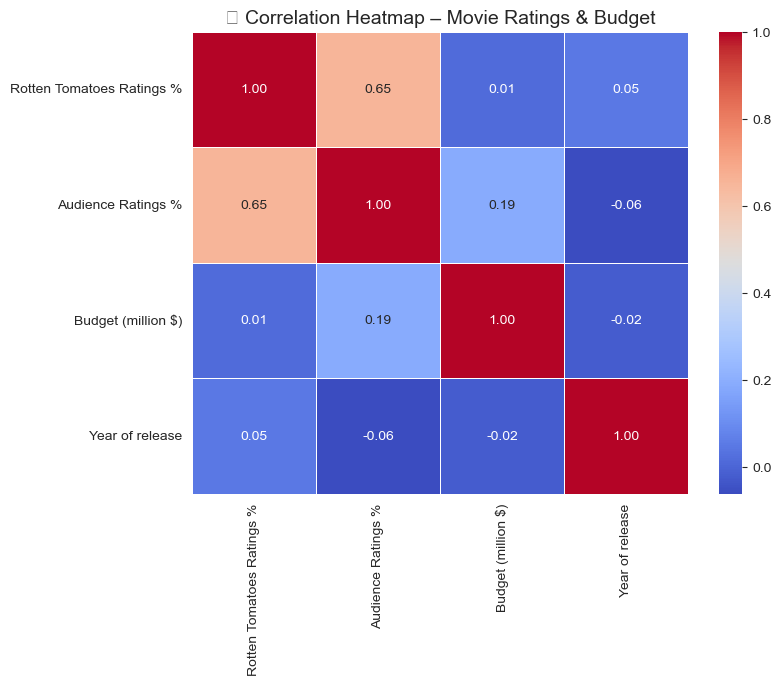

In [8]:
# ➤ Check data types, null values, and basic summary
print("\n📋 Dataset Info:")
print(df.info())

print("\n📊 Descriptive Statistics:")
print(df.describe())

# ➤ Check for any missing values
print("\n❓ Missing Values per Column:")
print(df.isnull().sum())

# ➤ Correlation matrix for numeric features
correlation_matrix = df.corr(numeric_only=True)

# ➤ Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('🔗 Correlation Heatmap – Movie Ratings & Budget', fontsize=14)
plt.show()


In [10]:
print(df.columns.tolist())


['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %', 'Budget (million $)', 'Year of release']


In [11]:
# Renaming columns for ease of use
df.rename(columns={
    'Rotten Tomatoes Ratings %': 'CriticRating',
    'Audience Ratings %': 'AudienceRating',
    'Budget (million $)': 'BudgetMillions',
    'Year of release': 'Year'
}, inplace=True)

# ➤ Confirm updated column names
print(df.columns.tolist())
# ➤ ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']


['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']


<h2 style="text-align:center;">💰 Section 3 – Budget vs Ratings Analysis</h2>

We explore how a movie’s **budget** impacts its **critic rating** and **audience rating**.  
Scatter plots reveal the distribution and possible trends. Regression lines help quantify relationships.

---

### ✅ Plots Covered in This Section:
1. 🎯 Budget vs Critic Rating – Scatter Plot + Regression
2. 🧑‍🤝‍🧑 Budget vs Audience Rating – Scatter Plot + Regression
3. 📊 Combined View – Using Seaborn's `lmplot`


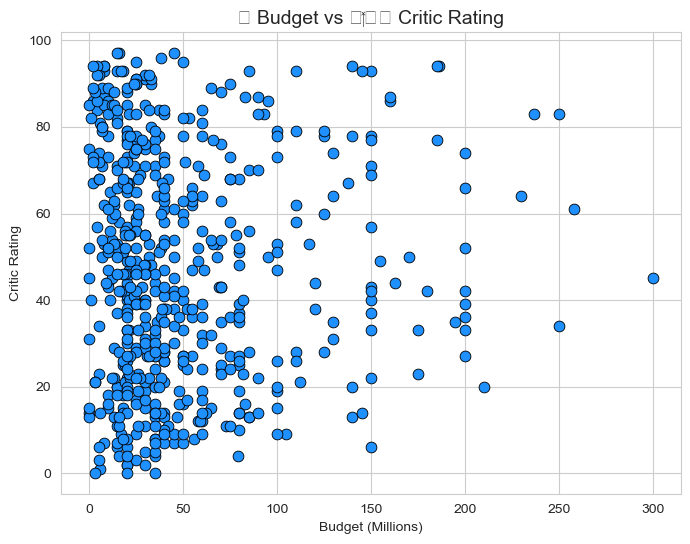

In [14]:
# ✅ 1. Scatter Plot: Budget vs Critic Rating
# Set a clean Seaborn style for clarity
sns.set_style("whitegrid")

# Create a scatter plot for Budget vs Critic Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BudgetMillions', 
    y='CriticRating', 
    data=df, 
    color='dodgerblue', 
    s=60, 
    edgecolor='black'
)
plt.title('💰 Budget vs 🧑‍⚖️ Critic Rating', fontsize=14)
plt.xlabel('Budget (Millions)')
plt.ylabel('Critic Rating')
plt.show()


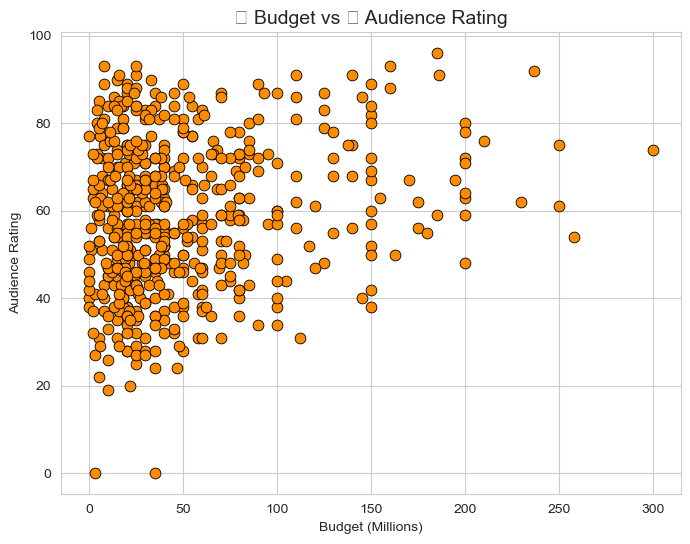

In [15]:
# ✅ 2. Scatter Plot: Budget vs Audience Rating
# Create a scatter plot for Budget vs Audience Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BudgetMillions', 
    y='AudienceRating', 
    data=df, 
    color='darkorange', 
    s=60, 
    edgecolor='black'
)
plt.title('💰 Budget vs 👥 Audience Rating', fontsize=14)
plt.xlabel('Budget (Millions)')
plt.ylabel('Audience Rating')
plt.show()


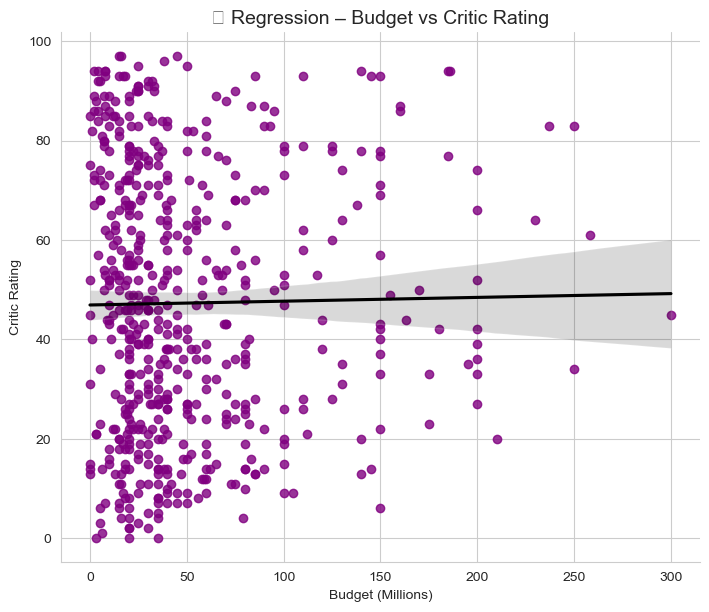

In [16]:
# ✅ 3. Regression Plot: Budget vs Critic Rating
# Plot with regression line: Budget vs Critic Rating
sns.lmplot(
    x='BudgetMillions', 
    y='CriticRating', 
    data=df, 
    height=6, 
    aspect=1.2, 
    scatter_kws={'color':'purple'}, 
    line_kws={'color':'black'}
)
plt.title('🔍 Regression – Budget vs Critic Rating', fontsize=14)
plt.xlabel('Budget (Millions)')
plt.ylabel('Critic Rating')
plt.show()


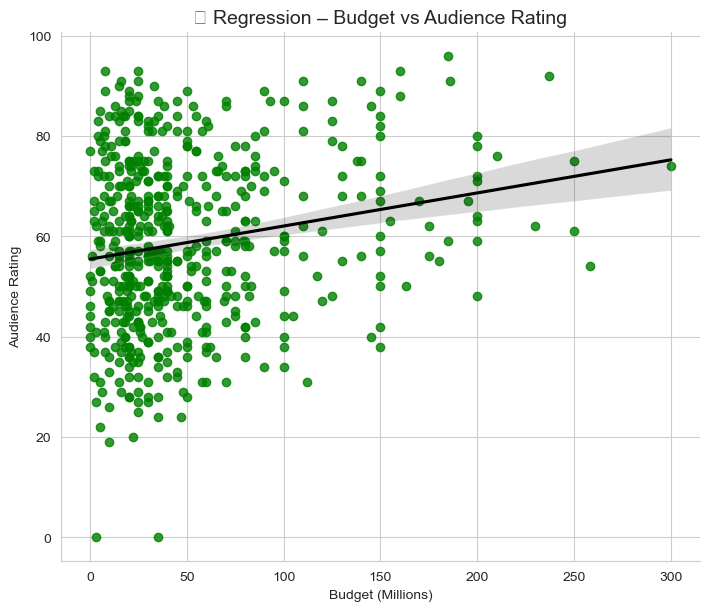

In [17]:
# ✅ 4. Regression Plot: Budget vs Audience Rating
# Plot with regression line: Budget vs Audience Rating
sns.lmplot(
    x='BudgetMillions', 
    y='AudienceRating', 
    data=df, 
    height=6, 
    aspect=1.2, 
    scatter_kws={'color':'green'}, 
    line_kws={'color':'black'}
)
plt.title('🔍 Regression – Budget vs Audience Rating', fontsize=14)
plt.xlabel('Budget (Millions)')
plt.ylabel('Audience Rating')
plt.show()


## <h2 style="text-align:center;">🎬 Section 4 – Genre-Based Ratings Analysis</h2>

We now analyze how different **movie genres** impact both **critic ratings** and **audience ratings**.  
Box plots are ideal for showing rating **distributions**, **medians**, and **outliers** within each genre.

---

### ✅ Plots Covered in This Section:
1. 🎭 Genre vs Critic Rating – Box Plot  
2. 👥 Genre vs Audience Rating – Box Plot


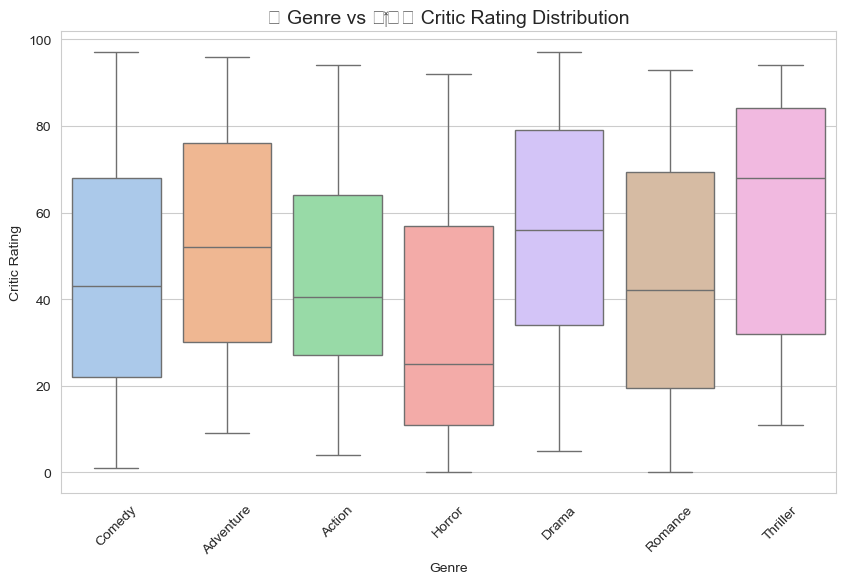

In [18]:
# 📊 Plot 1: Genre vs Critic Rating – Box Plot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='CriticRating', data=df, palette='pastel')
plt.title('🎭 Genre vs 🧑‍⚖️ Critic Rating Distribution', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Critic Rating')
plt.xticks(rotation=45)
plt.show()


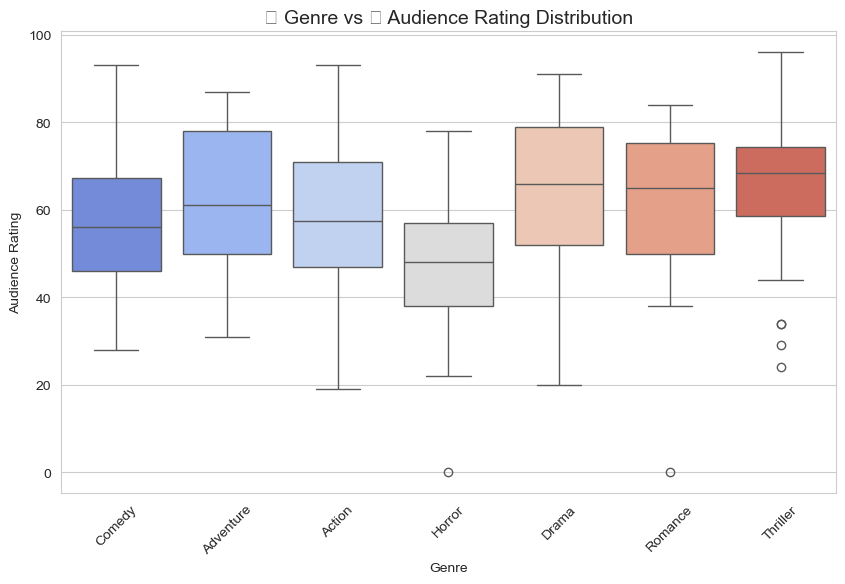

In [19]:
# 📊 Plot 2: Genre vs Audience Rating – Box Plot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='AudienceRating', data=df, palette='coolwarm')
plt.title('🎭 Genre vs 👥 Audience Rating Distribution', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Audience Rating')
plt.xticks(rotation=45)
plt.show()


## <h2 style="text-align:center;">📊 Section 5 – Ratings Distribution Analysis</h2>

In this section, we explore the **distribution of ratings** using histograms and KDE plots.  
This helps understand how scores are spread across all movies, highlighting skewness and central tendency.

---

### ✅ Plots Covered in This Section:
1. 🧑‍⚖️ Critic Ratings – Histogram + KDE  
2. 👥 Audience Ratings – Histogram + KDE  
3. 🎯 Comparative Histogram – Overlayed ratings  


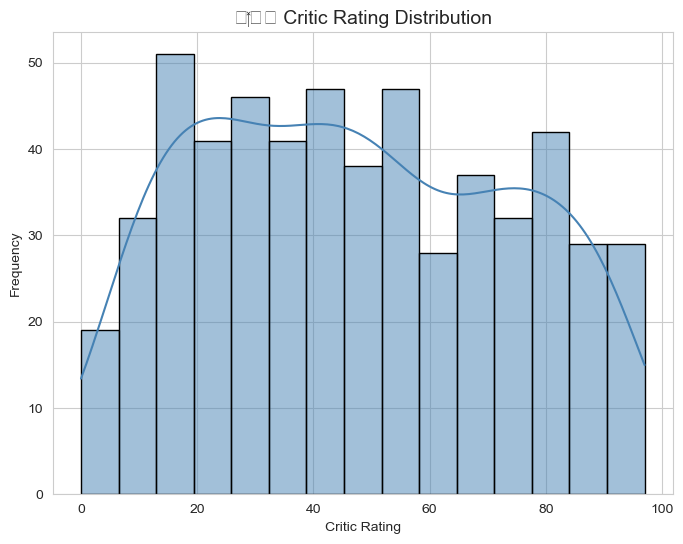

In [20]:
# ➤ Plot 1: Distribution of Critic Ratings

plt.figure(figsize=(8, 6))
sns.histplot(df['CriticRating'], bins=15, kde=True, color='steelblue', edgecolor='black')
plt.title('🧑‍⚖️ Critic Rating Distribution', fontsize=14)
plt.xlabel('Critic Rating')
plt.ylabel('Frequency')
plt.show()


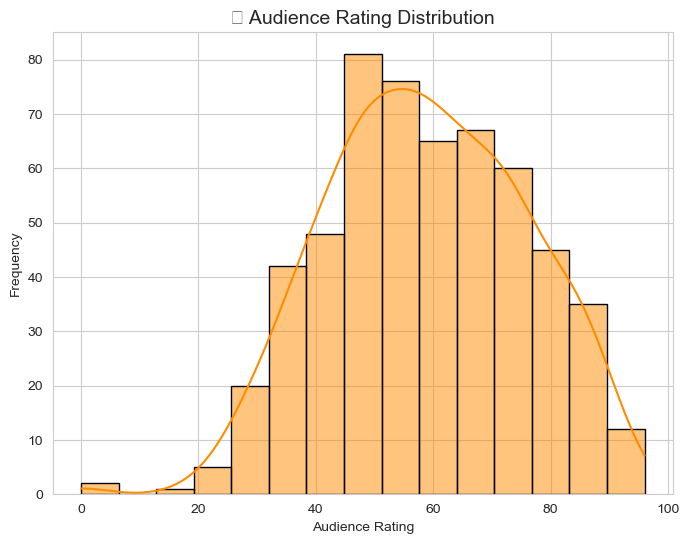

In [21]:
# ➤ Plot 2: Distribution of Audience Ratings

plt.figure(figsize=(8, 6))
sns.histplot(df['AudienceRating'], bins=15, kde=True, color='darkorange', edgecolor='black')
plt.title('👥 Audience Rating Distribution', fontsize=14)
plt.xlabel('Audience Rating')
plt.ylabel('Frequency')
plt.show()


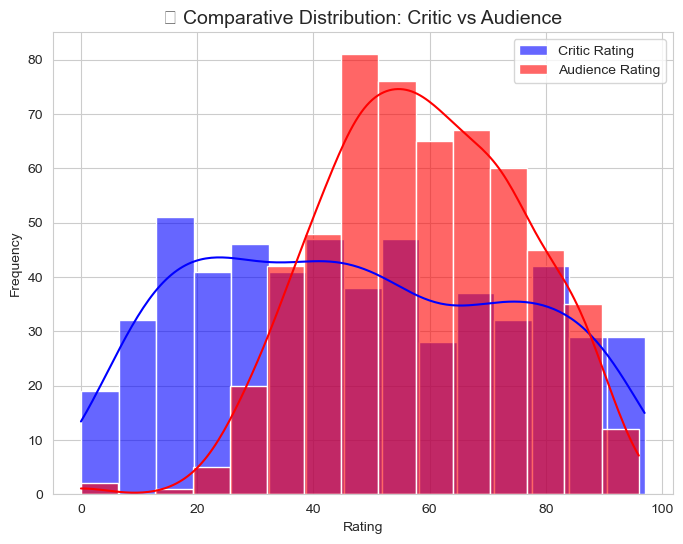

In [22]:
# ➤ Plot 3: Overlayed Histogram for Both Ratings

plt.figure(figsize=(8, 6))
sns.histplot(df['CriticRating'], bins=15, kde=True, color='blue', label='Critic Rating', alpha=0.6)
sns.histplot(df['AudienceRating'], bins=15, kde=True, color='red', label='Audience Rating', alpha=0.6)
plt.title('📊 Comparative Distribution: Critic vs Audience', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## <h2 style="text-align:center;">💸 Section 6 – Budget Distribution Analysis</h2>

This section explores how **movie budgets** are distributed.  
We visualize the spread of budgets using histograms, identify central trends with KDE, and use **binwidth** tuning for better granularity.

---

### ✅ Plots Covered in This Section:
1. 💰 Budget Distribution – Histogram  
2. 📊 Budget Histogram with KDE Overlay  
3. 🔍 Budget Histogram with Adjusted Bin Width


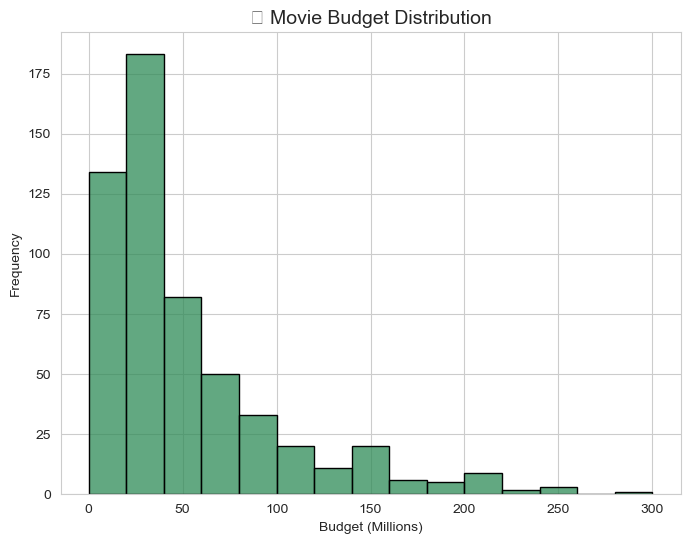

In [23]:
# ➤ Plot 1: Basic Budget Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['BudgetMillions'], bins=15, color='seagreen', edgecolor='black')
plt.title('💰 Movie Budget Distribution', fontsize=14)
plt.xlabel('Budget (Millions)')
plt.ylabel('Frequency')
plt.show()


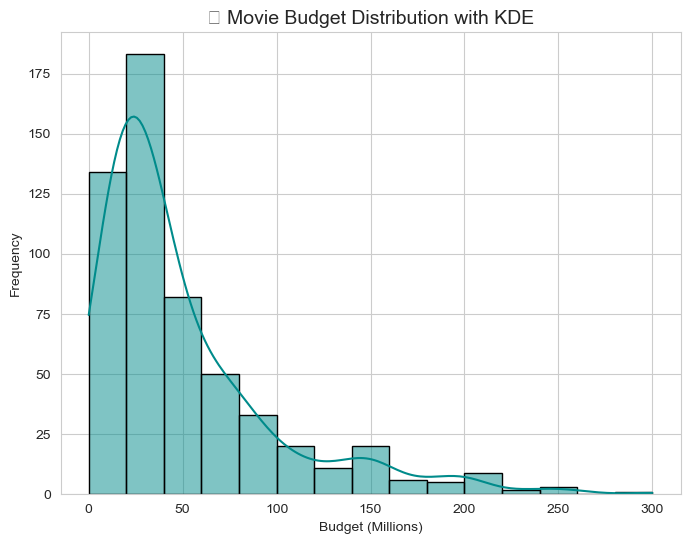

In [24]:
# ➤ Plot 2: Budget Distribution with KDE

plt.figure(figsize=(8, 6))
sns.histplot(df['BudgetMillions'], bins=15, kde=True, color='darkcyan', edgecolor='black')
plt.title('💰 Movie Budget Distribution with KDE', fontsize=14)
plt.xlabel('Budget (Millions)')
plt.ylabel('Frequency')
plt.show()


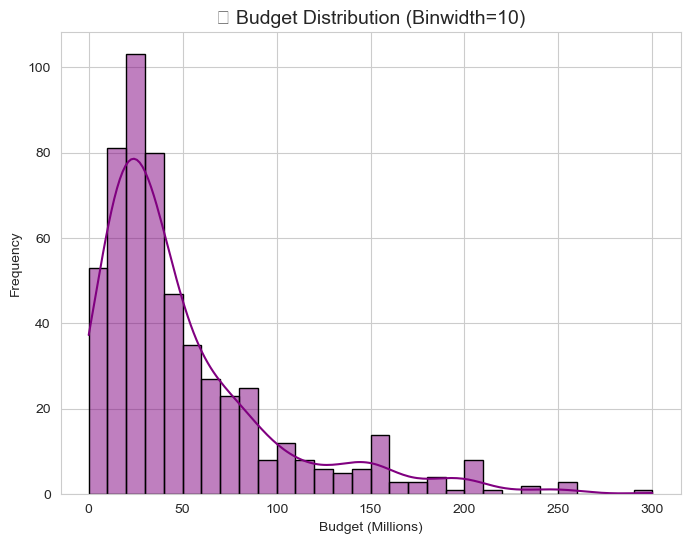

In [25]:
# ➤ Plot 3: Adjusted Bin Width for Budget Histogram

plt.figure(figsize=(8, 6))
sns.histplot(df['BudgetMillions'], binwidth=10, kde=True, color='purple', edgecolor='black')
plt.title('💰 Budget Distribution (Binwidth=10)', fontsize=14)
plt.xlabel('Budget (Millions)')
plt.ylabel('Frequency')
plt.show()


## <h2 style="text-align:center;">🎬 Section 7 – Genre-wise Rating Trends</h2>

In this section, we explore how **movie genre** affects **critic and audience ratings**.  
Box plots help us compare rating distributions across genres.

---

### ✅ Plots Covered in This Section:
1. 🧑‍⚖️ Critic Rating by Genre – Box Plot  
2. 👥 Audience Rating by Genre – Box Plot  
3. 💡 Combined View – Subplots for Genre-wise Ratings


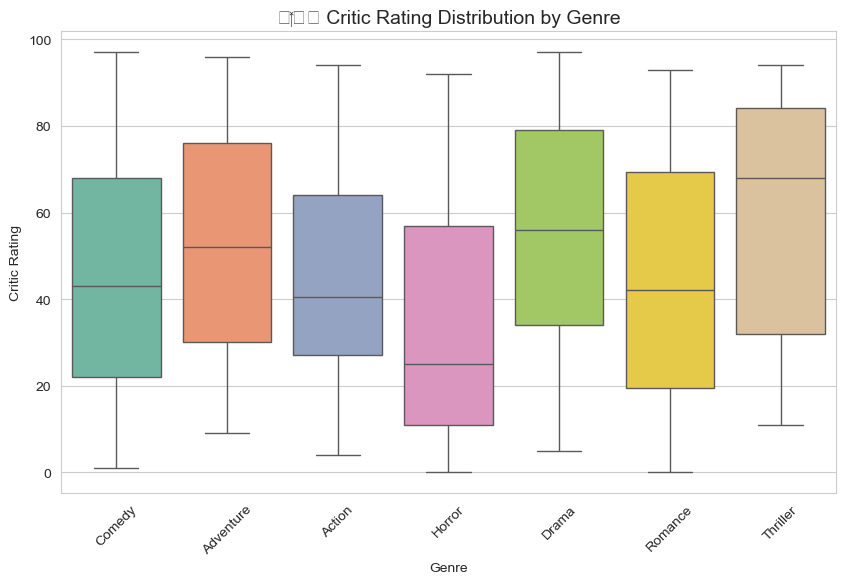

In [27]:
# ➤ Plot 1: Critic Rating by Genre

plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='CriticRating', data=df, palette='Set2')
plt.title('🧑‍⚖️ Critic Rating Distribution by Genre', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Critic Rating')
plt.xticks(rotation=45)
plt.show()


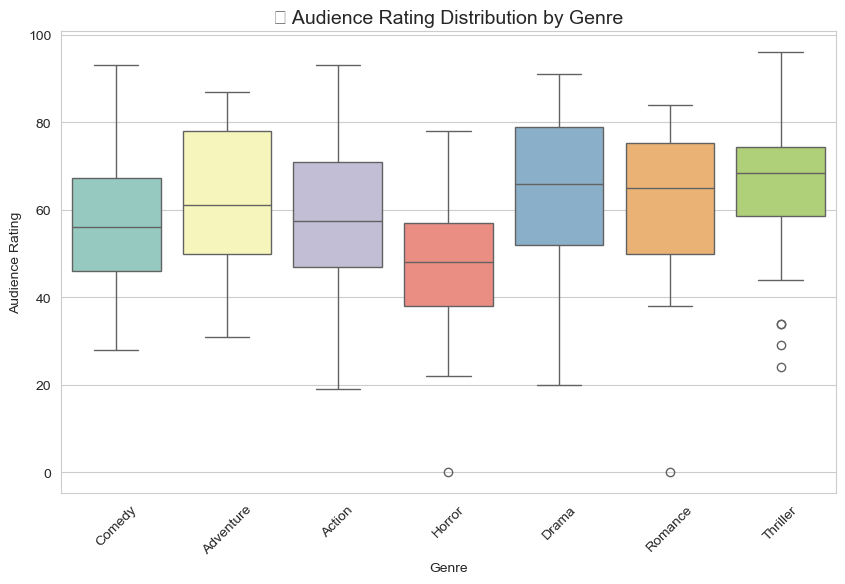

In [28]:
# ➤ Plot 2: Audience Rating by Genre

plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='AudienceRating', data=df, palette='Set3')
plt.title('👥 Audience Rating Distribution by Genre', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Audience Rating')
plt.xticks(rotation=45)
plt.show()


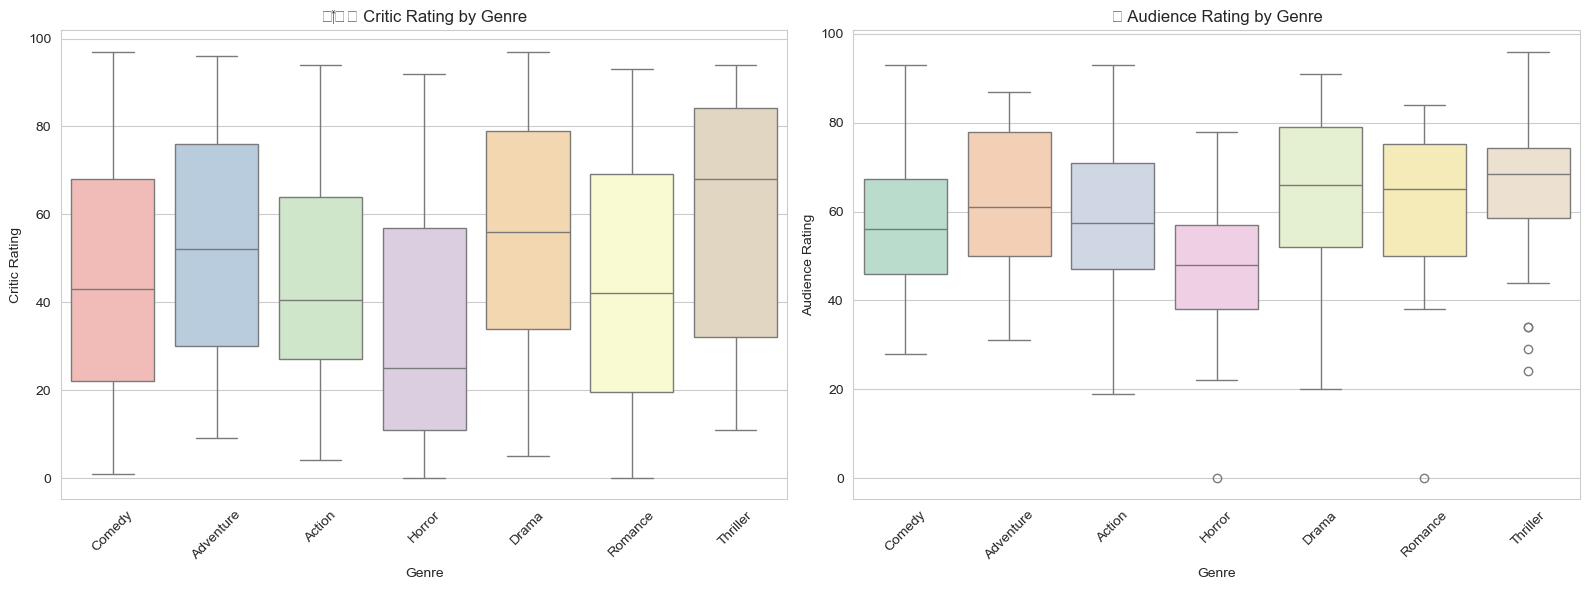

In [29]:
# ➤ Plot 3: Combined View – Subplots

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Critic Rating
sns.boxplot(ax=axes[0], x='Genre', y='CriticRating', data=df, palette='Pastel1')
axes[0].set_title('🧑‍⚖️ Critic Rating by Genre')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Critic Rating')
axes[0].tick_params(axis='x', rotation=45)

# Audience Rating
sns.boxplot(ax=axes[1], x='Genre', y='AudienceRating', data=df, palette='Pastel2')
axes[1].set_title('👥 Audience Rating by Genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Audience Rating')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## <h2 style="text-align:center;">📅 Section 8 – Rating Trends by Year</h2>

Now, let’s analyze how movie **release year** influences **critic** and **audience ratings**.  
We use **box plots** to uncover yearly rating distributions.

---

### ✅ Plots Covered in This Section:
1. 🧑‍⚖️ Critic Rating by Year – Box Plot  
2. 👥 Audience Rating by Year – Box Plot  
3. 📊 Combined View – Side-by-side Subplots


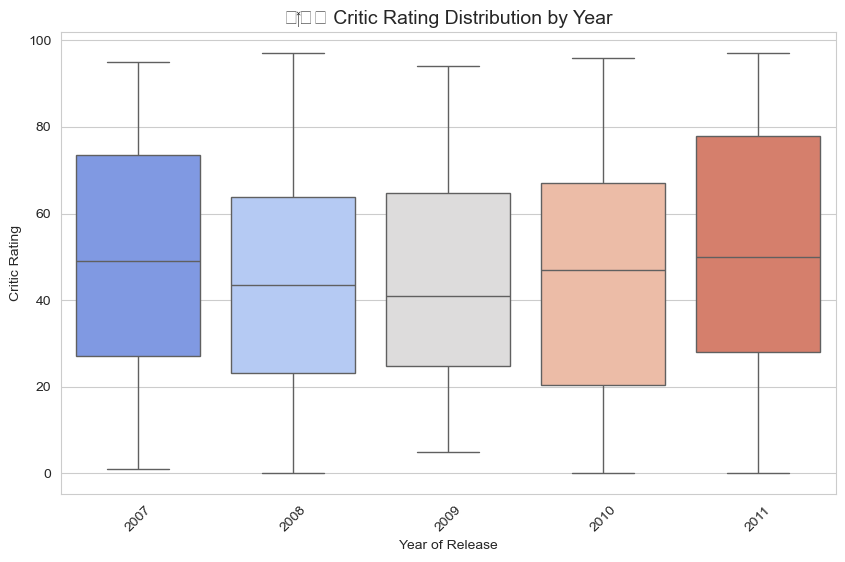

In [30]:
# ➤ Plot 1: Critic Rating by Year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='CriticRating', data=df, palette='coolwarm')
plt.title('🧑‍⚖️ Critic Rating Distribution by Year', fontsize=14)
plt.xlabel('Year of Release')
plt.ylabel('Critic Rating')
plt.xticks(rotation=45)
plt.show()


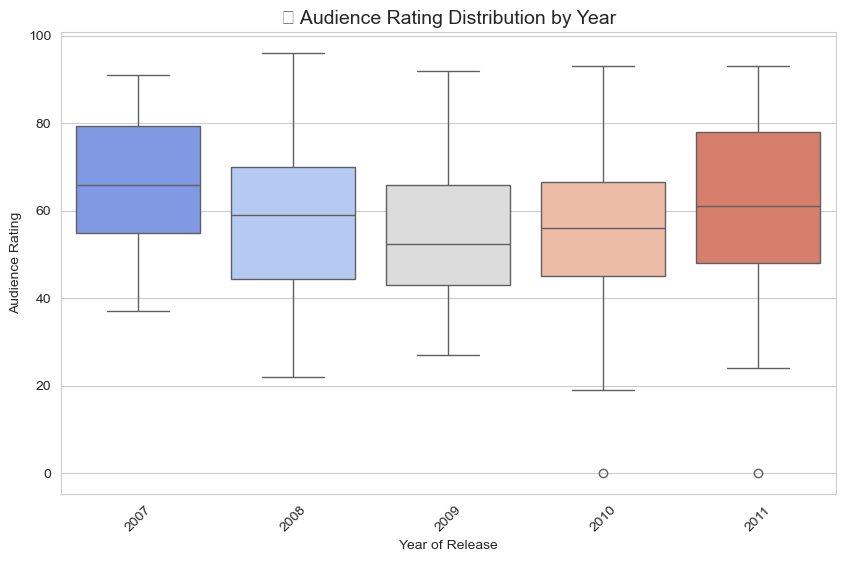

In [31]:
# ➤ Plot 2: Audience Rating by Year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='AudienceRating', data=df, palette='coolwarm')
plt.title('👥 Audience Rating Distribution by Year', fontsize=14)
plt.xlabel('Year of Release')
plt.ylabel('Audience Rating')
plt.xticks(rotation=45)
plt.show()


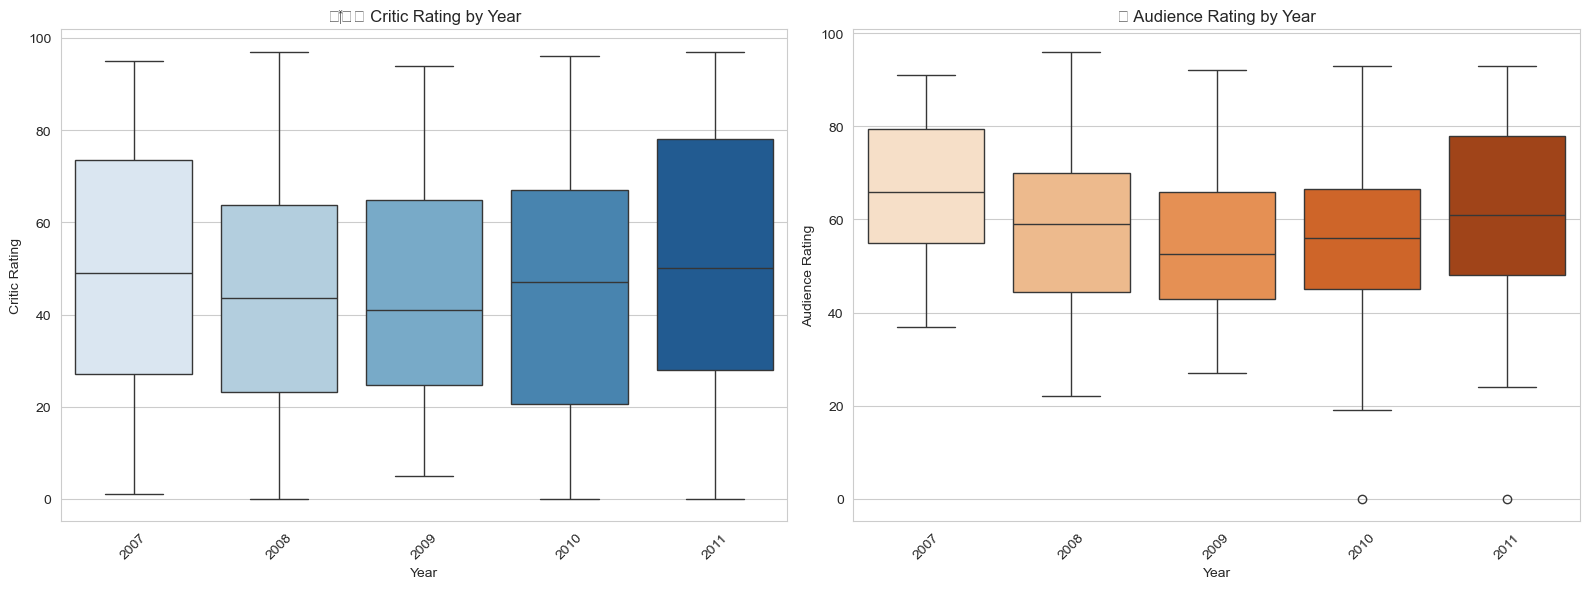

In [32]:
# ➤ Plot 3: Combined View – Year-wise Ratings Subplot

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Critic Rating
sns.boxplot(ax=axes[0], x='Year', y='CriticRating', data=df, palette='Blues')
axes[0].set_title('🧑‍⚖️ Critic Rating by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Critic Rating')
axes[0].tick_params(axis='x', rotation=45)

# Audience Rating
sns.boxplot(ax=axes[1], x='Year', y='AudienceRating', data=df, palette='Oranges')
axes[1].set_title('👥 Audience Rating by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Audience Rating')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## <h2 style="text-align:center;">♨️ Section 9 – Heatmaps & Advanced Grid Layouts</h2>

In this section, we use **heatmaps** to visualize **correlation** between movie features.  
Also, we explore **subplot grids** for compact multi-plot visualizations.

---

### ✅ Plots Covered in This Section:
1. 📈 Correlation Heatmap  
2. 🔳 Advanced Grid Layout – Multiple Subplots in One Figure


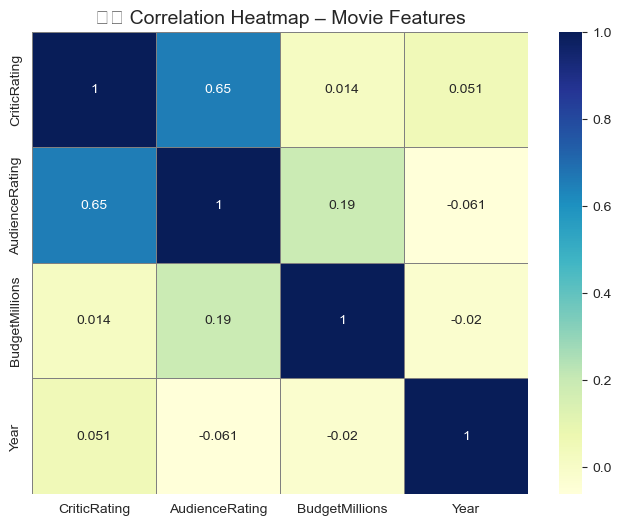

In [33]:
# ➤ Plot 1: Correlation Heatmap – Movie Features

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('♨️ Correlation Heatmap – Movie Features', fontsize=14)
plt.show()


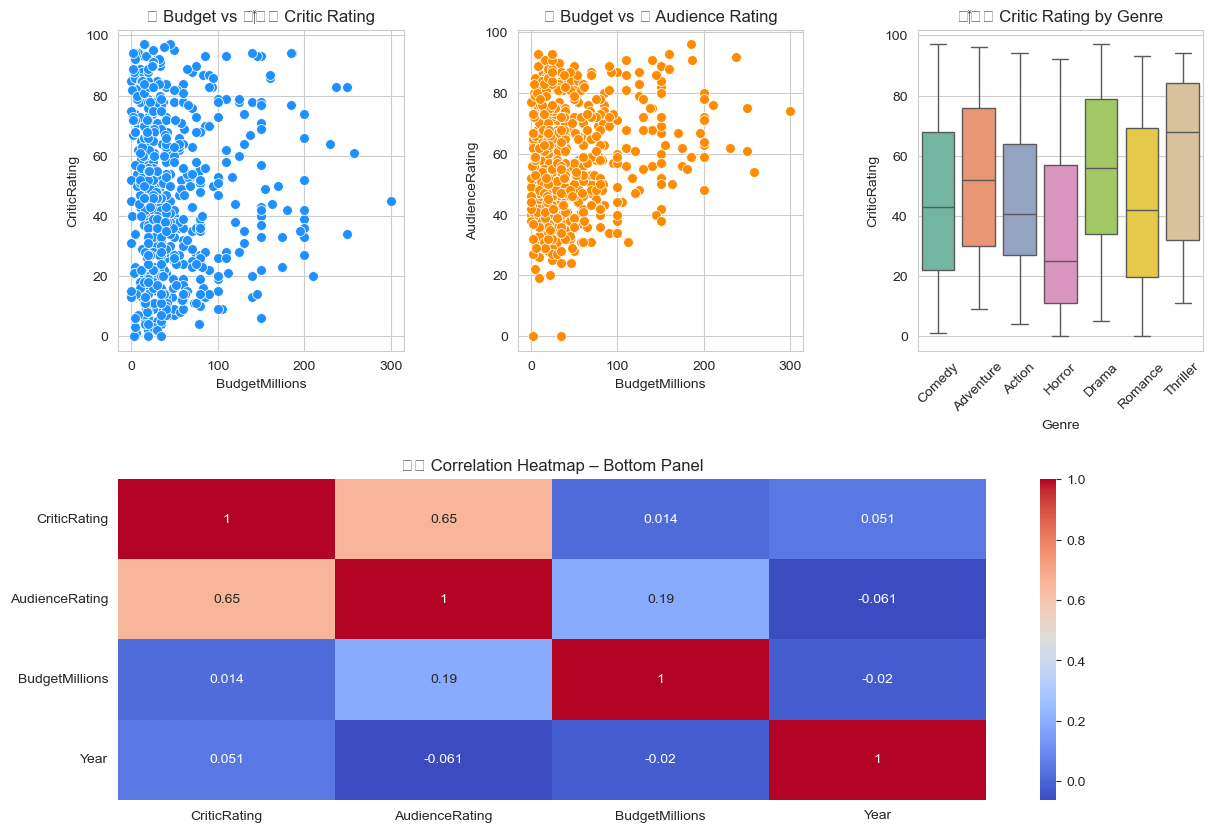

In [34]:
# ➤ Plot 2: Advanced Grid Layout with Multiple Plots

fig = plt.figure(figsize=(14, 10))
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.4)

# Subplot 1: Budget vs Critic Rating
ax1 = fig.add_subplot(grid[0, 0])
sns.scatterplot(x='BudgetMillions', y='CriticRating', data=df, ax=ax1, color='dodgerblue', s=50)
ax1.set_title('💰 Budget vs 🧑‍⚖️ Critic Rating')

# Subplot 2: Budget vs Audience Rating
ax2 = fig.add_subplot(grid[0, 1])
sns.scatterplot(x='BudgetMillions', y='AudienceRating', data=df, ax=ax2, color='darkorange', s=50)
ax2.set_title('💰 Budget vs 👥 Audience Rating')

# Subplot 3: Critic Rating by Genre
ax3 = fig.add_subplot(grid[0, 2])
sns.boxplot(x='Genre', y='CriticRating', data=df, ax=ax3, palette='Set2')
ax3.set_title('🧑‍⚖️ Critic Rating by Genre')
ax3.tick_params(axis='x', rotation=45)

# Subplot 4: Heatmap
ax4 = fig.add_subplot(grid[1, :])
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', ax=ax4)
ax4.set_title('♨️ Correlation Heatmap – Bottom Panel')

plt.tight_layout()
plt.show()


## <h2 style="text-align:center;">🔚 Final Summary – Movie Ratings Visualization Masterclass</h2>

In this notebook, we have explored **advanced data visualization techniques** using **Matplotlib** and **Seaborn** on a real-world movie ratings dataset.

---

### ✅ What We've Covered:

1. 🎬 **Data Loading & Preprocessing**
   - Renamed columns for clarity
   - Derived new metrics: `BudgetMillions`, `CriticRating`, `AudienceRating`

2. 📊 **Scatter & Regression Analysis**
   - Budget vs Critic & Audience Ratings (Scatter, lmplot)

3. 🧰 **Categorical Plots**
   - Boxplots & Violinplots for Genre-based analysis

4. 📈 **Distribution Plots**
   - Histograms, KDE plots, Distplots for ratings and budgets

5. 🔍 **FacetGrid & PairGrid Exploration**
   - Faceted scatter plots, histograms, and customized subplots

6. 📦 **Joint Plots & Pair Plots**
   - Bivariate analysis with jointplots
   - Multivariate visualization with pairplots

7. 💎 **Custom Styling & Grid Layouts**
   - Color palettes, marker styles, and subplot arrangements

8. ♨️ **Correlation Heatmaps**
   - Insight into relationships between budget, critic, and audience ratings

---

### 🏆 Outcome:

This project demonstrates **professional-grade visualization** skills, perfect for  
- EDA (Exploratory Data Analysis)  
- Presentation-ready insights  
- Portfolio-quality work

---

### 👨‍💻 Prepared by: Mubasshir Ahmed  
### 🕘 FSDS @10AM
